In [2]:
import matplotlib.pyplot as plt
import networkx as nx

C:\Users\yaozi\AppData\Local\Temp\ipykernel_19140\1618192452.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


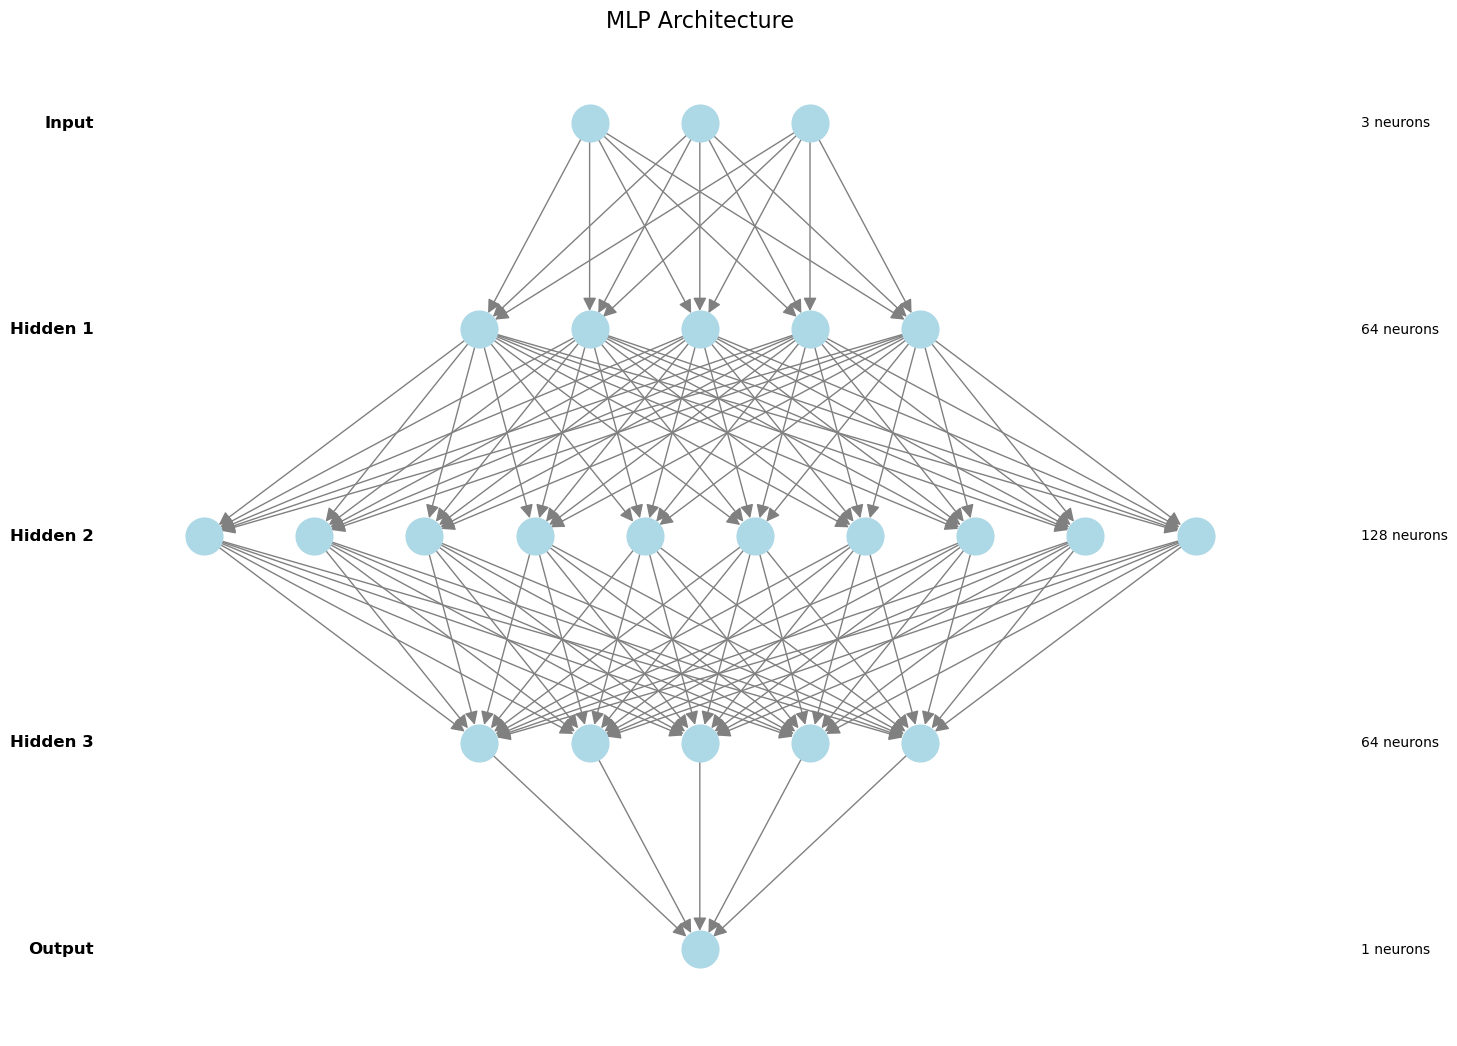

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_mlp(original_layers):
    original_layer_size = [3] + original_layers + [1]

    G = nx.DiGraph()
    pos = {}
    layers = [int(i / 12) for i in original_layers]
    layer_sizes = [3] + layers + [1]
    layer_names = ['Input'] + [f'Hidden {i+1}' for i in range(len(layers))] + ['Output']
    
    max_neurons = max(layer_sizes)
    layer_spacing = 1.5
    neuron_spacing = 1.0

    for i, (size, name) in enumerate(zip(layer_sizes, layer_names)):
        layer_width = (size - 1) * neuron_spacing
        x_offset = (max_neurons - size) * neuron_spacing / 2
        for j in range(size):
            node_id = f"{name}_{j}"
            x = x_offset + j * neuron_spacing
            y = -i * layer_spacing
            G.add_node(node_id)
            pos[node_id] = (x, y)
        
        if i > 0:
            for j in range(size):
                for k in range(layer_sizes[i-1]):
                    G.add_edge(f"{layer_names[i-1]}_{k}", f"{name}_{j}")

    plt.figure(figsize=(12, 10))
    nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=700, arrowsize=20, edge_color='gray')
    
    # 添加层标签
    for i, name in enumerate(layer_names):
        plt.text(-1, -i * layer_spacing, name, ha='right', va='center', fontsize=12, fontweight='bold')

    # 添加神经元数量标签
    for i, size in enumerate(original_layer_size):
        plt.text(max_neurons * neuron_spacing + 0.5, -i * layer_spacing, f"{size} neurons", ha='left', va='center', fontsize=10)

    plt.title("MLP Architecture", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 可视化MLP结构
plot_mlp([64, 128, 64])

C:\Users\yaozi\AppData\Local\Temp\ipykernel_19140\3715152852.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


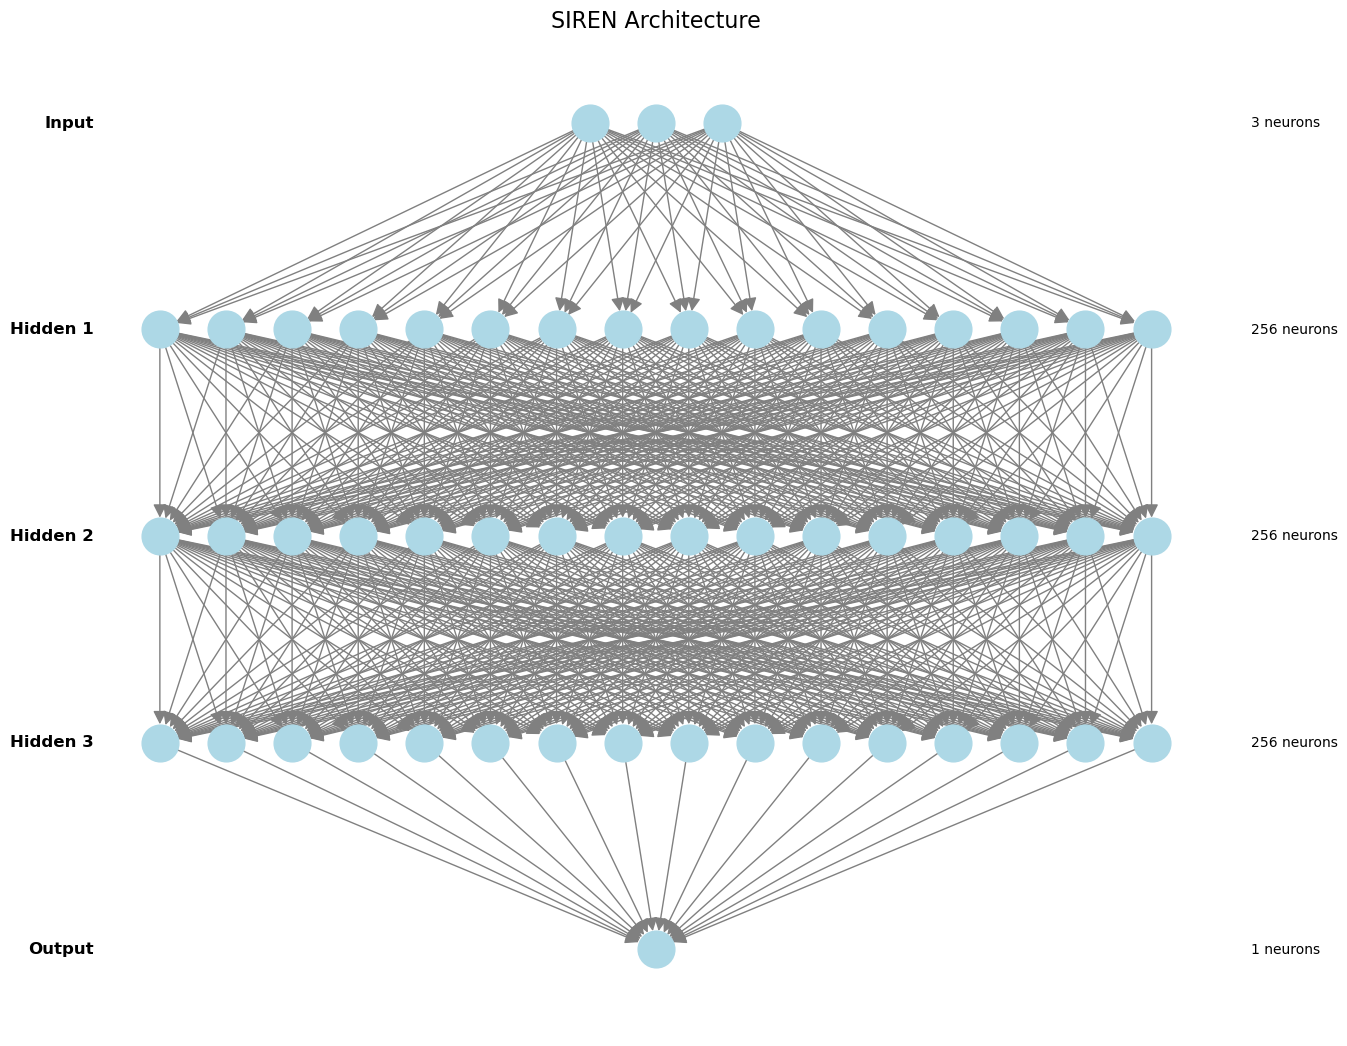

In [13]:

def plot_siren(original_layers):
    original_layer_size = [3] + original_layers + [1]

    G = nx.DiGraph()
    pos = {}
    layers = [int(i / 16) for i in original_layers]
    layer_sizes = [3] + layers + [1]
    layer_names = ['Input'] + [f'Hidden {i+1}' for i in range(len(layers))] + ['Output']
    
    max_neurons = max(layer_sizes)
    layer_spacing = 1.5
    neuron_spacing = 1.0

    for i, (size, name) in enumerate(zip(layer_sizes, layer_names)):
        layer_width = (size - 1) * neuron_spacing
        x_offset = (max_neurons - size) * neuron_spacing / 2
        for j in range(size):
            node_id = f"{name}_{j}"
            x = x_offset + j * neuron_spacing
            y = -i * layer_spacing
            G.add_node(node_id)
            pos[node_id] = (x, y)
        
        if i > 0:
            for j in range(size):
                for k in range(layer_sizes[i-1]):
                    G.add_edge(f"{layer_names[i-1]}_{k}", f"{name}_{j}")

    plt.figure(figsize=(12, 10))
    nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=700, arrowsize=20, edge_color='gray')
    
    # 添加层标签
    for i, name in enumerate(layer_names):
        plt.text(-1, -i * layer_spacing, name, ha='right', va='center', fontsize=12, fontweight='bold')

    # 添加神经元数量标签
    for i, size in enumerate(original_layer_size):
        plt.text(max_neurons * neuron_spacing + 0.5, -i * layer_spacing, f"{size} neurons", ha='left', va='center', fontsize=10)

    plt.title("SIREN Architecture", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_siren([256, 256, 256])